In [29]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import csv
from tqdm import tqdm
import pandas as pd

import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split



In [30]:
output_dir = os.path.join(".", "output_front_ppo")
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()

combined_arr = np.empty((len(subdirs), 1000, 10))
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")
    obs_filename = os.path.join(subdir, "obs.csv")
    action_df = pd.read_csv(action_filename,  header=None)
    obs_df = pd.read_csv(obs_filename,  header=None)
    combined_data = pd.concat([action_df, obs_df], axis=1)
    combined_arr[i-1] = np.reshape(combined_data.values, (1000, 10))
print(combined_arr.shape)
combined_tensor = torch.from_numpy(combined_arr)

(10000, 1000, 10)


In [31]:
output_dir = os.path.join(".", "output_front_ppo")
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()
combined_arr_f = np.empty((len(subdirs), 1000, 10))
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")
    obs_filename = os.path.join(subdir, "obs.csv")
    action_df = pd.read_csv(action_filename,  header=None)
    obs_df = pd.read_csv(obs_filename,  header=None)
    combined_data = pd.concat([action_df, obs_df], axis=1)
    combined_arr_f[i-1] = np.reshape(combined_data.values, (1000, 10))

print(combined_arr_f.shape)
combined_tensor_f = torch.from_numpy(combined_arr_f)

(10000, 1000, 10)


In [32]:
output_dir = os.path.join(".", "output_bw_ppo")
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()

combined_arr_b = np.empty((len(subdirs), 1000, 10))
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")
    obs_filename = os.path.join(subdir, "obs.csv")
    action_df = pd.read_csv(action_filename,  header=None)
    obs_df = pd.read_csv(obs_filename,  header=None)
    combined_data = pd.concat([action_df, obs_df], axis=1)
    combined_arr_b[i-1] = np.reshape(combined_data.values, (1000, 10))
print(combined_arr_b.shape)
combined_tensor_b = torch.from_numpy(combined_arr_b)

(10000, 1000, 10)


In [33]:
output_dir = os.path.join(".", "output_right_ppo")
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()

combined_arr_r = np.empty((len(subdirs), 1000, 10))
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")
    obs_filename = os.path.join(subdir, "obs.csv")
    action_df = pd.read_csv(action_filename,  header=None)
    obs_df = pd.read_csv(obs_filename,  header=None)
    combined_data = pd.concat([action_df, obs_df], axis=1)
    combined_arr_r[i-1] = np.reshape(combined_data.values, (1000, 10))
print(combined_arr_r.shape)
combined_tensor_r = torch.from_numpy(combined_arr_r)

(10000, 1000, 10)


In [34]:
datasetf = TensorDataset(combined_tensor_f.float())
datasetb = TensorDataset(combined_tensor_b.float())
datasetr = TensorDataset(combined_tensor_r.float())
batch_size = 512
input_shape = combined_tensor_r.shape[1] * combined_tensor_r.shape[2]
ftrain_size = int(0.7 * len(datasetf))
fvalid_size = int(0.15 * len(datasetf))
ftest_size = len(datasetf) - ftrain_size - fvalid_size
ftrain_dataset, fvalid_dataset, ftest_dataset = random_split(datasetf, [ftrain_size, fvalid_size, ftest_size])
ftrain_loader = DataLoader(ftrain_dataset, batch_size=batch_size, shuffle=True)
fvalid_loader = DataLoader(fvalid_dataset, batch_size=batch_size, shuffle=True)
ftest_loader = DataLoader(ftest_dataset, batch_size=batch_size, shuffle=True)
btrain_size = int(0.7 * len(datasetb))
bvalid_size = int(0.15 * len(datasetb))
btest_size = len(datasetb) - btrain_size - bvalid_size
btrain_dataset, bvalid_dataset, btest_dataset = random_split(datasetb, [btrain_size, bvalid_size, btest_size])
btrain_loader = DataLoader(btrain_dataset, batch_size=batch_size, shuffle=True)
bvalid_loader = DataLoader(bvalid_dataset, batch_size=batch_size, shuffle=True)
btest_loader = DataLoader(btest_dataset, batch_size=batch_size, shuffle=True)
rtrain_size = int(0.7 * len(datasetr))
rvalid_size = int(0.15 * len(datasetr))
rtest_size = len(datasetr) - rtrain_size - rvalid_size
rtrain_dataset, rvalid_dataset, rtest_dataset = random_split(datasetr, [rtrain_size, rvalid_size, rtest_size])
rtrain_loader = DataLoader(rtrain_dataset, batch_size=batch_size, shuffle=True)
rvalid_loader = DataLoader(rvalid_dataset, batch_size=batch_size, shuffle=True)
rtest_loader = DataLoader(rtest_dataset, batch_size=batch_size, shuffle=True)

# VAE code -1

====> Epoch: 1 Average loss: 0.031700552122933524, Recon Loss: 0.001992450364998409, KL Div: 0.02970810195377895
====> Epoch: 2 Average loss: 0.01846798651559012, Recon Loss: 0.0019913293293544222, KL Div: 0.0164766571862357
====> Epoch: 3 Average loss: 0.017754348482404435, Recon Loss: 0.001989676969391959, KL Div: 0.015764671530042376
====> Epoch: 4 Average loss: 0.017701694352286204, Recon Loss: 0.001987688490322658, KL Div: 0.015714005742754254
====> Epoch: 5 Average loss: 0.017602849074772425, Recon Loss: 0.0019856028045926776, KL Div: 0.015617246082850865
====> Epoch: 6 Average loss: 0.017527578490121026, Recon Loss: 0.0019830279861177717, KL Div: 0.015544550486973353
====> Epoch: 7 Average loss: 0.017451299122401648, Recon Loss: 0.001980242873941149, KL Div: 0.01547105632509504
====> Epoch: 8 Average loss: 0.017370122023991175, Recon Loss: 0.001977217469896589, KL Div: 0.015392904213496617
====> Epoch: 9 Average loss: 0.017284141063690184, Recon Loss: 0.0019740595391818457, KL D

====> Epoch: 73 Average loss: 0.007593257938112531, Recon Loss: 0.0005697499726499829, KL Div: 0.007023507969720023
====> Epoch: 74 Average loss: 0.0074455577645983016, Recon Loss: 0.0005423488106046404, KL Div: 0.006903208868844169
====> Epoch: 75 Average loss: 0.007298996482576643, Recon Loss: 0.0005149788068873542, KL Div: 0.006784017630985805
====> Epoch: 76 Average loss: 0.007158212218965803, Recon Loss: 0.000492262350661414, KL Div: 0.006665949889591762
====> Epoch: 77 Average loss: 0.007015175001961844, Recon Loss: 0.0004661555545670646, KL Div: 0.006549019438879831
====> Epoch: 78 Average loss: 0.006875023262841361, Recon Loss: 0.0004417854973248073, KL Div: 0.006433237791061402
====> Epoch: 79 Average loss: 0.0067395392486027305, Recon Loss: 0.0004209202826023102, KL Div: 0.006318618944713047
====> Epoch: 80 Average loss: 0.006607402324676514, Recon Loss: 0.0004022303628070014, KL Div: 0.006205171959740775
====> Epoch: 81 Average loss: 0.0064754674775259835, Recon Loss: 0.0003

====> Epoch: 143 Average loss: 8.465342436517988e-05, Recon Loss: 8.420431613922119e-05, KL Div: 4.4910822595868793e-07
====> Epoch: 144 Average loss: 8.319229313305446e-05, Recon Loss: 8.275170837129865e-05, KL Div: 4.405847617558071e-07
====> Epoch: 145 Average loss: 8.236563525029592e-05, Recon Loss: 8.193563457046236e-05, KL Div: 4.3000067983354843e-07
====> Epoch: 146 Average loss: 8.177416345902852e-05, Recon Loss: 8.134639369589943e-05, KL Div: 4.2776976312909805e-07
====> Epoch: 147 Average loss: 8.040156055774007e-05, Recon Loss: 7.998716777988843e-05, KL Div: 4.143927778516497e-07
====> Epoch: 148 Average loss: 8.014070082988058e-05, Recon Loss: 7.97335116990975e-05, KL Div: 4.0718913078308106e-07
====> Epoch: 149 Average loss: 7.928098206009183e-05, Recon Loss: 7.887703712497438e-05, KL Div: 4.0394493511744907e-07
====> Epoch: 150 Average loss: 7.785456255078315e-05, Recon Loss: 7.745929860642978e-05, KL Div: 3.9526394435337613e-07
====> Epoch: 151 Average loss: 7.7213687556

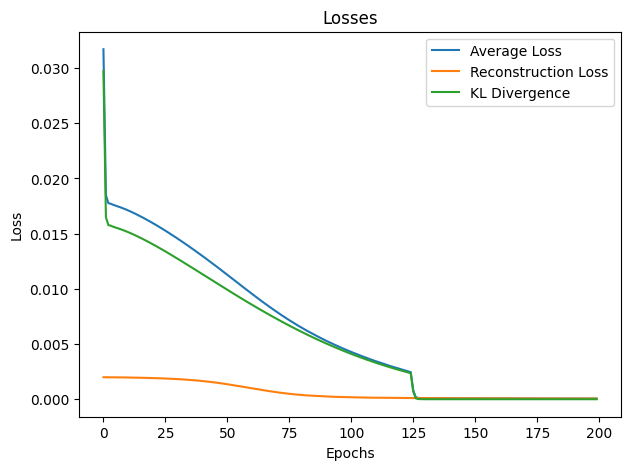

In [35]:
class Encoder(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, latent_dim * 2)  # mean and variance
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=1)
        return mu, log_var, h


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_shape):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, output_shape),
        )

    def forward(self, z):
        x_reconstructed = self.decoder(z)
        return x_reconstructed


class VAE(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var, h = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, log_var

    
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

# Assuming combined_tensor is your data
# Convert the data to float32
dataset = TensorDataset(combined_tensor.float())

# Define the data loader
batch_size = 512  # adjust as necessary

# Split data into train, validation, and test
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for testing

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Hyperparameters
# input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]  # modify this to match your data
# hidden_dim1 = 128  # modify as needed
# hidden_dim2 = 64  # modify as needed
# hidden_dim3 = 24  # modify as needed
# latent_dim = 2  # modify as needed
# lr = 5e-5  # learning rate
# n_epochs = 200  # modify as needed
# beta = 0.2
input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]  # modify this to match your data
hidden_dim1 = 64  # modify as needed
hidden_dim2 = 32  # modify as needed
hidden_dim3 = 8  # modify as needed
latent_dim = 2  # modify as needed
lr = 5e-5  # learning rate
n_epochs = 200  # modify as needed
beta = 1
    
    
# Model, optimizer, and loss function
model = VAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)


optimizer = optim.RAdam(model.parameters(), lr=lr)  # Make sure you're using the correct optimizer
loss_fn = nn.MSELoss()  # And the correct loss function


def train(epoch, model, optimizer, loss_fn, train_loader):
    model.train()
    train_loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    for i, batch in enumerate(train_loader):  # using train_loader instead of dataloader
        batch_data = batch[0]  # get the data from the batch
        
        optimizer.zero_grad()

        # Flatten the data
        batch_data = batch_data.view(batch_data.size(0), -1)

        reconstructed_batch, mu, log_var = model(batch_data)

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta*kl_divergence

        loss.backward()
        train_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = total_recon_loss / len(train_loader.dataset)
    avg_kl_div = total_kl_div / len(train_loader.dataset)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')

    return avg_loss, avg_recon_loss, avg_kl_div

    
import matplotlib.pyplot as plt

# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    avg_loss, avg_recon_loss, avg_kl_div = train(epoch, model, optimizer, loss_fn, train_loader)
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss)
    avg_kl_divs.append(avg_kl_div)

# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
bavg_losses = []
bavg_recon_losses = []
bavg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    bavg_loss, bavg_recon_loss, bavg_kl_div = train(epoch, model, optimizer, loss_fn, btrain_loader)
    bavg_losses.append(bavg_loss)
    bavg_recon_losses.append(bavg_recon_loss)
    bavg_kl_divs.append(bavg_kl_div)
ravg_losses = []
ravg_recon_losses = []
ravg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    ravg_loss, ravg_recon_loss, ravg_kl_div = train(epoch, model, optimizer, loss_fn, rtrain_loader)
    ravg_losses.append(ravg_loss)
    ravg_recon_losses.append(ravg_recon_loss)
    ravg_kl_divs.append(ravg_kl_div)
favg_losses = []
favg_recon_losses = []
favg_kl_divs = []
for epoch in range(1, n_epochs + 1):
    favg_loss, favg_recon_loss, favg_kl_div = train(epoch, model, optimizer, loss_fn, ftrain_loader)
    favg_losses.append(favg_loss)
    favg_recon_losses.append(favg_recon_loss)
    favg_kl_divs.append(favg_kl_div)


====> Epoch: 1 Average loss: 0.0285451626096453, Recon Loss: 0.0035503665890012468, KL Div: 0.024994796071733747
====> Epoch: 2 Average loss: 0.00539496271950858, Recon Loss: 0.002986002649579729, KL Div: 0.0024089600230966296
====> Epoch: 3 Average loss: 0.002993010061127799, Recon Loss: 0.0025860605410167148, KL Div: 0.0004069494903087616
====> Epoch: 4 Average loss: 0.002504458291190011, Recon Loss: 0.0023319266693932667, KL Div: 0.00017253161753926958
====> Epoch: 5 Average loss: 0.002249487144606454, Recon Loss: 0.0021587646859032765, KL Div: 9.072245018822806e-05
====> Epoch: 6 Average loss: 0.0020903746911457607, Recon Loss: 0.0020289316943713598, KL Div: 6.144303934914725e-05
====> Epoch: 7 Average loss: 0.0019743605511529103, Recon Loss: 0.0019283756017684937, KL Div: 4.598496215684073e-05
====> Epoch: 8 Average loss: 0.001880156227520534, Recon Loss: 0.0018439419354711261, KL Div: 3.621430907930647e-05
====> Epoch: 9 Average loss: 0.001807468967778342, Recon Loss: 0.001777704

====> Epoch: 71 Average loss: 0.0009216127608503614, Recon Loss: 0.0009194517731666565, KL Div: 2.160987683704921e-06
====> Epoch: 72 Average loss: 0.0009205619011606489, Recon Loss: 0.0009184439395155226, KL Div: 2.1179616451263426e-06
====> Epoch: 73 Average loss: 0.0009179988248007638, Recon Loss: 0.0009159258646624429, KL Div: 2.072960138320923e-06
====> Epoch: 74 Average loss: 0.0009174344965389797, Recon Loss: 0.0009153970607689449, KL Div: 2.03743577003479e-06
====> Epoch: 75 Average loss: 0.0009165535186018263, Recon Loss: 0.0009145536720752717, KL Div: 1.9998465265546527e-06
====> Epoch: 76 Average loss: 0.0009171317347458431, Recon Loss: 0.0009151655520711627, KL Div: 1.966182674680437e-06
====> Epoch: 77 Average loss: 0.0009132178596087864, Recon Loss: 0.0009112818155969893, KL Div: 1.936044011797224e-06
====> Epoch: 78 Average loss: 0.0009139025849955422, Recon Loss: 0.000911995108638491, KL Div: 1.9074763570513044e-06
====> Epoch: 79 Average loss: 0.0009100777591977801, Re

====> Epoch: 141 Average loss: 0.0008884225658008031, Recon Loss: 0.0008875360829489571, KL Div: 8.864828518458775e-07
====> Epoch: 142 Average loss: 0.0008853605815342494, Recon Loss: 0.0008844810170786721, KL Div: 8.795644555773054e-07
====> Epoch: 143 Average loss: 0.000886023793901716, Recon Loss: 0.0008851550306592669, KL Div: 8.687632424490792e-07
====> Epoch: 144 Average loss: 0.000886701979807445, Recon Loss: 0.0008858386022703988, KL Div: 8.6337753704616e-07
====> Epoch: 145 Average loss: 0.0008860726484230586, Recon Loss: 0.0008852190715926034, KL Div: 8.535768304552351e-07
====> Epoch: 146 Average loss: 0.0008845365515777043, Recon Loss: 0.0008836899442332131, KL Div: 8.466073444911412e-07
====> Epoch: 147 Average loss: 0.0008851521824087416, Recon Loss: 0.0008843135748590741, KL Div: 8.386075496673584e-07
====> Epoch: 148 Average loss: 0.0008857478541987283, Recon Loss: 0.0008849160202911921, KL Div: 8.318339075360979e-07
====> Epoch: 149 Average loss: 0.0008847360142639705

====> Epoch: 11 Average loss: 0.0014700002329690117, Recon Loss: 0.00144009724685124, KL Div: 2.990299037524632e-05
====> Epoch: 12 Average loss: 0.0014234949861254011, Recon Loss: 0.0013968301585742405, KL Div: 2.6664844581059048e-05
====> Epoch: 13 Average loss: 0.001379103456224714, Recon Loss: 0.0013549738781792778, KL Div: 2.412958230291094e-05
====> Epoch: 14 Average loss: 0.0013383184586252485, Recon Loss: 0.0013161729063306535, KL Div: 2.2145548037120275e-05
====> Epoch: 15 Average loss: 0.001299632225717817, Recon Loss: 0.0012791801946503776, KL Div: 2.0452009780066354e-05
====> Epoch: 16 Average loss: 0.0012610691360064915, Recon Loss: 0.0012422180090631758, KL Div: 1.8851135458265034e-05
====> Epoch: 17 Average loss: 0.001223845294543675, Recon Loss: 0.001206494723047529, KL Div: 1.7350562981196812e-05
====> Epoch: 18 Average loss: 0.0011887725336211068, Recon Loss: 0.0011729377252714974, KL Div: 1.5834812607084003e-05
====> Epoch: 19 Average loss: 0.0011548017859458924, Rec

====> Epoch: 81 Average loss: 0.00044479316685880934, Recon Loss: 0.00044205970210688453, KL Div: 2.733464751924787e-06
====> Epoch: 82 Average loss: 0.0004431826238121305, Recon Loss: 0.00044048662057944707, KL Div: 2.6960032326834543e-06
====> Epoch: 83 Average loss: 0.0004419085660151073, Recon Loss: 0.0004392524766070502, KL Div: 2.6560894080570764e-06
====> Epoch: 84 Average loss: 0.00044167861981051306, Recon Loss: 0.0004390130447489875, KL Div: 2.6655750615256174e-06
====> Epoch: 85 Average loss: 0.00044122276987348285, Recon Loss: 0.00043857915486608234, KL Div: 2.6436150074005126e-06
====> Epoch: 86 Average loss: 0.0004404513261147908, Recon Loss: 0.0004378737998860223, KL Div: 2.5775262287684848e-06
====> Epoch: 87 Average loss: 0.0004399793531213488, Recon Loss: 0.0004374485569340842, KL Div: 2.5307961872645786e-06
====> Epoch: 88 Average loss: 0.0004391710864646094, Recon Loss: 0.0004366608325924192, KL Div: 2.510253872190203e-06
====> Epoch: 89 Average loss: 0.000438324713

====> Epoch: 150 Average loss: 0.0004282305751528059, Recon Loss: 0.00042694371512957984, KL Div: 1.2868600232260568e-06
====> Epoch: 151 Average loss: 0.00042822290318352837, Recon Loss: 0.00042694056034088134, KL Div: 1.2823428426470076e-06
====> Epoch: 152 Average loss: 0.0004281844219991139, Recon Loss: 0.00042693614321095605, KL Div: 1.2482787881578718e-06
====> Epoch: 153 Average loss: 0.000428569142307554, Recon Loss: 0.0004273345513003213, KL Div: 1.234591007232666e-06
====> Epoch: 154 Average loss: 0.0004278145581483841, Recon Loss: 0.0004265740577663694, KL Div: 1.2405003820146832e-06
====> Epoch: 155 Average loss: 0.0004280176545892443, Recon Loss: 0.00042679446084158764, KL Div: 1.2231937476566859e-06
====> Epoch: 156 Average loss: 0.00042822303303650445, Recon Loss: 0.00042699832788535525, KL Div: 1.2247051511492047e-06
====> Epoch: 157 Average loss: 0.00042722791646208083, Recon Loss: 0.0004260127523115703, KL Div: 1.2151641505105154e-06
====> Epoch: 158 Average loss: 0.0

====> Epoch: 19 Average loss: 0.0004260222613811493, Recon Loss: 0.00042575417246137345, KL Div: 2.680889197758266e-07
====> Epoch: 20 Average loss: 0.0003845090504203524, Recon Loss: 0.00038424756910119737, KL Div: 2.6148131915501185e-07
====> Epoch: 21 Average loss: 0.00034761718128408707, Recon Loss: 0.0003473591272320066, KL Div: 2.580540520804269e-07
====> Epoch: 22 Average loss: 0.00031463077664375304, Recon Loss: 0.0003143813865525382, KL Div: 2.493900912148612e-07
====> Epoch: 23 Average loss: 0.00028493920607226234, Recon Loss: 0.00028469774765627726, KL Div: 2.4145841598510743e-07
====> Epoch: 24 Average loss: 0.00025884758893932616, Recon Loss: 0.0002586134150624275, KL Div: 2.3417387689862931e-07
====> Epoch: 25 Average loss: 0.00023520264348813466, Recon Loss: 0.00023497147538832256, KL Div: 2.311680998120989e-07
====> Epoch: 26 Average loss: 0.00021452081948518753, Recon Loss: 0.00021429653997932161, KL Div: 2.2427950586591447e-07
====> Epoch: 27 Average loss: 0.000196250

====> Epoch: 88 Average loss: 5.3136877449495455e-05, Recon Loss: 5.304540986461299e-05, KL Div: 9.146758488246372e-08
====> Epoch: 89 Average loss: 5.310709987367903e-05, Recon Loss: 5.3017939840044295e-05, KL Div: 8.916003363473074e-08
====> Epoch: 90 Average loss: 5.313551479152271e-05, Recon Loss: 5.304610782435962e-05, KL Div: 8.940696716308594e-08
====> Epoch: 91 Average loss: 5.311399937740394e-05, Recon Loss: 5.302420498004981e-05, KL Div: 8.979439735412597e-08
====> Epoch: 92 Average loss: 5.3125209042004176e-05, Recon Loss: 5.3039331521306716e-05, KL Div: 8.587752069745745e-08
====> Epoch: 93 Average loss: 5.302049006734576e-05, Recon Loss: 5.293581315449306e-05, KL Div: 8.467691285269601e-08
====> Epoch: 94 Average loss: 5.289184062608651e-05, Recon Loss: 5.280735955706665e-05, KL Div: 8.448106901986258e-08
====> Epoch: 95 Average loss: 5.291687830218247e-05, Recon Loss: 5.283322318324021e-05, KL Div: 8.365511894226074e-08
====> Epoch: 96 Average loss: 5.2808085190398355e-05

====> Epoch: 157 Average loss: 5.1947617371167456e-05, Recon Loss: 5.188377228166376e-05, KL Div: 6.384508950369699e-08
====> Epoch: 158 Average loss: 5.194070935249328e-05, Recon Loss: 5.1877532686506e-05, KL Div: 6.317666598728724e-08
====> Epoch: 159 Average loss: 5.184734665921756e-05, Recon Loss: 5.177420750260353e-05, KL Div: 7.313915661403111e-08
====> Epoch: 160 Average loss: 5.193643245313849e-05, Recon Loss: 5.184886897248881e-05, KL Div: 8.756348064967564e-08
====> Epoch: 161 Average loss: 5.183858344597476e-05, Recon Loss: 5.177293744470392e-05, KL Div: 6.564600127083915e-08
====> Epoch: 162 Average loss: 5.1769949229700225e-05, Recon Loss: 5.171434661107404e-05, KL Div: 5.5602618626185824e-08
====> Epoch: 163 Average loss: 5.191741484616484e-05, Recon Loss: 5.180205857115132e-05, KL Div: 1.1535627501351492e-07
====> Epoch: 164 Average loss: 5.1794989034533504e-05, Recon Loss: 5.1719699853232926e-05, KL Div: 7.528918130057199e-08
====> Epoch: 165 Average loss: 5.17160354980

In [37]:
def evaluate(model, loss_fn, dataloader):
    model.eval()
    loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            batch_data = batch[0]

            # Flatten the data
            batch_data = batch_data.view(batch_data.size(0), -1)

            reconstructed_batch, mu, log_var = model(batch_data)

            # Loss: reconstruction loss + KL divergence
            recon_loss = loss_fn(reconstructed_batch, batch_data)
            kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            loss += recon_loss + kl_divergence
            total_recon_loss += recon_loss.item()
            total_kl_div += kl_divergence.item()

    avg_loss = loss / len(dataloader.dataset)
    avg_recon_loss = total_recon_loss / len(dataloader.dataset)
    avg_kl_div = total_kl_div / len(dataloader.dataset)

    return avg_loss, avg_recon_loss, avg_kl_div
evaluate(model, loss_fn, test_loader)

(tensor(5.0391e-05), 5.028069640199343e-05, 1.10626220703125e-07)

# latent space

In [38]:
# encoded_representations_forward = []
# encoded_representations_backward = []
# encoded_representations_right = []
# model.eval()
# with torch.no_grad():
#     for batch in ftest_loader:
#         batch_data = batch[0]
#         batch_data = batch_data.view(batch_data.size(0), -1)
#         batch_data = batch_data.float()
#         _, _, h = model.encoder(batch_data)
#         encoded_representations_forward.append(h)

# encoded_representations_forward = torch.cat(encoded_representations_forward, dim=0).numpy()

# with torch.no_grad():
#     for batch in btest_loader:
#         batch_data = batch[0]
#         batch_data = batch_data.view(batch_data.size(0), -1)
#         batch_data = batch_data.float()
#         _, _, h = model.encoder(batch_data)
#         encoded_representations_backward.append(h)
        
# encoded_representations_backward = torch.cat(encoded_representations_backward, dim=0).numpy()

# with torch.no_grad():
#     for batch in rtest_loader:
#         batch_data = batch[0]
#         batch_data = batch_data.view(batch_data.size(0), -1)
#         batch_data = batch_data.float()
#         _, _, h = model.encoder(batch_data)
#         encoded_representations_right.append(h)
        
# encoded_representations_right = torch.cat(encoded_representations_right, dim=0).numpy()

# plt.figure(figsize=(8, 6))
# plt.scatter(encoded_representations_forward[:, 0], encoded_representations_forward[:, 2], alpha=0.5, s=2, label='Forward')
# plt.scatter(encoded_representations_backward[:, 0], encoded_representations_backward[:, 2], alpha=0.5, s=2, label='Backward')
# plt.scatter(encoded_representations_right[:, 0], encoded_representations_right[:, 2], alpha=0.5, s=2, label='Right')

# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.title('2D Visualization of Encoded Representations (h values)')
# plt.legend()
# plt.show()


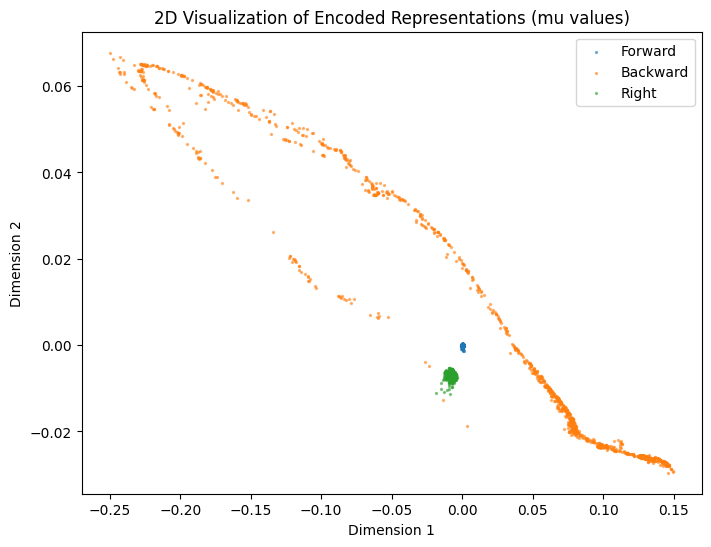

In [40]:
encoded_representations_forward = []
encoded_representations_backward = []
encoded_representations_right = []
model.eval()
with torch.no_grad():
    for batch in ftest_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        mu, _, _ = model.encoder(batch_data)
        encoded_representations_forward.append(mu)
        
encoded_representations_forward = torch.cat(encoded_representations_forward, dim=0).numpy()

with torch.no_grad():
    for batch in btest_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        mu, _, _ = model.encoder(batch_data)
        encoded_representations_backward.append(mu)
        
encoded_representations_backward = torch.cat(encoded_representations_backward, dim=0).numpy()

with torch.no_grad():
    for batch in rtest_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        mu, _, _ = model.encoder(batch_data)
        encoded_representations_right.append(mu)
        
encoded_representations_right = torch.cat(encoded_representations_right, dim=0).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(encoded_representations_forward[:, 0], encoded_representations_forward[:, 1], alpha=0.5, s=2, label='Forward')
plt.scatter(encoded_representations_backward[:, 0], encoded_representations_backward[:, 1], alpha=0.5, s=2, label='Backward')
plt.scatter(encoded_representations_right[:, 0], encoded_representations_right[:, 1], alpha=0.5, s=2, label='Right')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Visualization of Encoded Representations (mu values)')
plt.legend()
plt.show()


# Define rendering with action

In [25]:
import matplotlib.pyplot as plt
from IPython import display
import gym


def replay(combined_data):

    action_sp = combined_data.iloc[:, :2]
    obs_sp = combined_data.iloc[:, 2:]

    env = gym.make('Swimmer-v3', render_mode = 'human')

    for i in range(len(action_sp)):
        action = action_sp.iloc[i]
        observation = obs_sp.iloc[i]

        if i == 0:
            env.reset()

        # Apply the action
        next_observation, reward, done, trunc, info = env.step(action)
        # Render the environment
        env.render()
#         time.sleep(0.01)

    env.close()


# Predict

Epoch [1/500] - Avg Loss: 0.9973
Epoch [2/500] - Avg Loss: 0.9953
Epoch [3/500] - Avg Loss: 0.9935
Epoch [4/500] - Avg Loss: 0.9921
Epoch [5/500] - Avg Loss: 0.9908
Epoch [6/500] - Avg Loss: 0.9897
Epoch [7/500] - Avg Loss: 0.9888
Epoch [8/500] - Avg Loss: 0.9879
Epoch [9/500] - Avg Loss: 0.9871
Epoch [10/500] - Avg Loss: 0.9864
Epoch [11/500] - Avg Loss: 0.9857
Epoch [12/500] - Avg Loss: 0.9851
Epoch [13/500] - Avg Loss: 0.9845
Epoch [14/500] - Avg Loss: 0.9840
Epoch [15/500] - Avg Loss: 0.9835
Epoch [16/500] - Avg Loss: 0.9829
Epoch [17/500] - Avg Loss: 0.9824
Epoch [18/500] - Avg Loss: 0.9819
Epoch [19/500] - Avg Loss: 0.9814
Epoch [20/500] - Avg Loss: 0.9809
Epoch [21/500] - Avg Loss: 0.9804
Epoch [22/500] - Avg Loss: 0.9799
Epoch [23/500] - Avg Loss: 0.9794
Epoch [24/500] - Avg Loss: 0.9789
Epoch [25/500] - Avg Loss: 0.9783
Epoch [26/500] - Avg Loss: 0.9778
Epoch [27/500] - Avg Loss: 0.9772
Epoch [28/500] - Avg Loss: 0.9767
Epoch [29/500] - Avg Loss: 0.9761
Epoch [30/500] - Avg Lo

Epoch [239/500] - Avg Loss: 0.0408
Epoch [240/500] - Avg Loss: 0.0401
Epoch [241/500] - Avg Loss: 0.0394
Epoch [242/500] - Avg Loss: 0.0388
Epoch [243/500] - Avg Loss: 0.0383
Epoch [244/500] - Avg Loss: 0.0377
Epoch [245/500] - Avg Loss: 0.0371
Epoch [246/500] - Avg Loss: 0.0366
Epoch [247/500] - Avg Loss: 0.0361
Epoch [248/500] - Avg Loss: 0.0356
Epoch [249/500] - Avg Loss: 0.0351
Epoch [250/500] - Avg Loss: 0.0347
Epoch [251/500] - Avg Loss: 0.0343
Epoch [252/500] - Avg Loss: 0.0338
Epoch [253/500] - Avg Loss: 0.0335
Epoch [254/500] - Avg Loss: 0.0331
Epoch [255/500] - Avg Loss: 0.0328
Epoch [256/500] - Avg Loss: 0.0324
Epoch [257/500] - Avg Loss: 0.0322
Epoch [258/500] - Avg Loss: 0.0318
Epoch [259/500] - Avg Loss: 0.0314
Epoch [260/500] - Avg Loss: 0.0313
Epoch [261/500] - Avg Loss: 0.0309
Epoch [262/500] - Avg Loss: 0.0307
Epoch [263/500] - Avg Loss: 0.0304
Epoch [264/500] - Avg Loss: 0.0302
Epoch [265/500] - Avg Loss: 0.0300
Epoch [266/500] - Avg Loss: 0.0297
Epoch [267/500] - Av

Epoch [475/500] - Avg Loss: 0.0246
Epoch [476/500] - Avg Loss: 0.0246
Epoch [477/500] - Avg Loss: 0.0246
Epoch [478/500] - Avg Loss: 0.0246
Epoch [479/500] - Avg Loss: 0.0247
Epoch [480/500] - Avg Loss: 0.0246
Epoch [481/500] - Avg Loss: 0.0247
Epoch [482/500] - Avg Loss: 0.0246
Epoch [483/500] - Avg Loss: 0.0246
Epoch [484/500] - Avg Loss: 0.0246
Epoch [485/500] - Avg Loss: 0.0246
Epoch [486/500] - Avg Loss: 0.0246
Epoch [487/500] - Avg Loss: 0.0245
Epoch [488/500] - Avg Loss: 0.0245
Epoch [489/500] - Avg Loss: 0.0245
Epoch [490/500] - Avg Loss: 0.0246
Epoch [491/500] - Avg Loss: 0.0247
Epoch [492/500] - Avg Loss: 0.0247
Epoch [493/500] - Avg Loss: 0.0245
Epoch [494/500] - Avg Loss: 0.0246
Epoch [495/500] - Avg Loss: 0.0245
Epoch [496/500] - Avg Loss: 0.0246
Epoch [497/500] - Avg Loss: 0.0245
Epoch [498/500] - Avg Loss: 0.0246
Epoch [499/500] - Avg Loss: 0.0246
Epoch [500/500] - Avg Loss: 0.0246


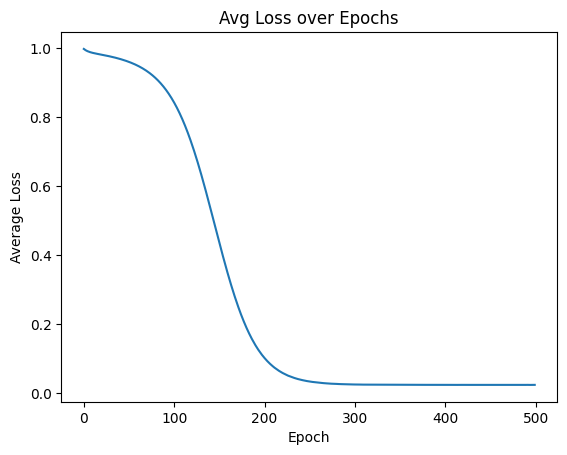

In [26]:
output_dim = combined_tensor.shape[1] * combined_tensor.shape[2]

with torch.no_grad():
    mu, _, _ = model.encoder(train_dataset[:][0].view(len(train_dataset), -1))
    
class Predictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

predictor = Predictor(latent_dim, output_dim)
optimizer = optim.SGD(predictor.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
    
n_epochs = 500
losses = []

for epoch in range(n_epochs):
    total_loss = 0
    for batch in train_loader:
        data = batch[0].view(len(batch[0]), -1)
        with torch.no_grad():
            latent_vars, _, _ = model.encoder(data)
        predicted_data = predictor(latent_vars)

        loss = loss_fn(predicted_data, data)
        total_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{n_epochs}] - Avg Loss: {avg_loss:.4f}")

import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Avg Loss over Epochs')
plt.show()

predictions = []

with torch.no_grad():
    reshaped_data = valid_dataset[0][0].view(-1, 10000)
    for data_point in reshaped_data:
        mu, _, _ = model.encoder(data_point.unsqueeze(0))
        prediction = predictor(mu)
        predictions.append(prediction.squeeze().numpy())

predicted_data_numpy = np.array(predictions)
predicted_data_numpy = predicted_data_numpy.reshape(1000,10)
final_predicted_actions = predicted_data_numpy[:, :2]

# replay(pd.DataFrame(final_predicted_actions))

In [ ]:
# replay(pd.DataFrame(final_predicted_actions))

# see the output of VAE

In [ ]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)


In [ ]:
# Get the first row from the dataframe
first_row_reco = reconstructed_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_reco_array = np.reshape(first_row_reco.values, (1000, 10))

# Convert it back to a dataframe
reshaped_df_reco = pd.DataFrame(reshaped_reco_array)
recon_combined_tensor = torch.tensor(reshaped_df_reco.values)


In [ ]:
replay(reshaped_df_reco)

In [ ]:
# Get the first row from the dataframe
first_row_ori = original_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_array_ori = np.reshape(first_row_ori.values, (1000, 10))

# Convert it back to a dataframe
reshaped_df_ori = pd.DataFrame(reshaped_array_ori)
ori_combined_tensor = torch.tensor(reshaped_df_ori.values)


In [ ]:
replay(reshaped_df_ori)

In [ ]:
# Flatten the tensors
flattened_ori = ori_combined_tensor.flatten()
flattened_recon = recon_combined_tensor.flatten()

# Calculate the Euclidean distance
euclidean_distance = torch.norm(flattened_ori - flattened_recon)


print(euclidean_distance)


In [ ]:
ori_combined_np = original_df.to_numpy()
recon_combined_np = reconstructed_df.to_numpy()

# Column names
column_names = ['action space : Torque applied on the first rotor', 
                'action space : Torque applied on the second rotor', 
                'obs0:angle of the front tip', 'obs1: angle of the first rotor', 
                'obs2: angle of the second rotor', 'obs3: velocity of the tip along the x-axis',
                'obs4: velocity of the tip along the y-axis', 'obs5: angular velocity of front tip',
                'obs6: angular velocity of first rotor', 'obs7: angular velocity of second rotor']

# Create a figure
plt.figure(figsize=(20, 20))

# Create subplots for each column
for i in range(10):  # Assuming you have 10 columns
    plt.subplot(5, 2, i+1)  # 5 rows and 2 columns of subplots
    plt.scatter(ori_combined_np[i, :], recon_combined_np[i, :], alpha=0.5, s=5)
    plt.title(column_names[i])
    plt.xlabel('Original')
    plt.ylabel('Reconstructed')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Get encoded representations (h values) for all data points
encoded_representations = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        _, _, h = model.encoder(batch_data)  # Get the encoded representation (h value) directly
        encoded_representations.append(h)

encoded_representations = torch.cat(encoded_representations, dim=0).numpy()

# Assuming the encoded representations are 2D, plot the data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_representations[:, 0], encoded_representations[:, 1], alpha=0.5, s=3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Visualization of Encoded Representations (h values)')
plt.show()


In [ ]:
# Get encoded representations (h values) for all data points
encoded_representations = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        _, _, h = model.encoder(batch_data)  # Get the encoded representation (h value) directly
        encoded_representations.append(h)

encoded_representations = torch.cat(encoded_representations, dim=0).numpy()

# Assuming the encoded representations are 2D, plot the data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_representations[:, 0], encoded_representations[:, 2], alpha=0.5, s=3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Visualization of Encoded Representations (h values)')
plt.show()
